## 작성법

1. 1번(Regression)과 2번(Classification) EDA 섹션에 $Expected \ Output$과 유사한(동일할 필요는 없음) 시각화 자료를 출력하는 코드 작성
   - `matplotlib`, `seaborn`, `plotly` 등 시각화 툴은 자유롭게 선택 가능
2. 전처리 및 변수선택은 각자의 아이디어로 진행
3. 교차검증과 하이퍼파라미터 튜닝, 의사결정나무에 대한 예제는 같이 첨부한 `Additional_Resource.ipynb` 참고
4. **코드에 대한 설명을 주석으로 남길 것**

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# 수정금지
def seed_everything(seed: int = 42):
    import random
    import numpy as np
    import os

    random.seed(seed)
    np.random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

RANDOM_SEED = 42
seed_everything(seed=RANDOM_SEED)

## 1) Regression

### • Dataset

In [3]:
train = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/train_set_1.csv')
X_test = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/test_X_1.csv')

In [4]:
X_train = train.drop('count', axis = 1)
Y_train = train['count']

### • EDA (Exploratory Data Analysis)

#### - 출력변수 분포

$Expected \ Output:$

![image](fig/1_1.png)

(array([23., 31., 45., 53., 40., 36., 34., 26., 25., 19., 17., 12.,  9.,
        22., 19., 11., 24., 26., 25., 19., 39., 26., 21., 30., 32., 18.,
        34., 31., 19., 15., 20., 24., 15., 19., 19., 12.,  7., 11.,  8.,
        13.,  6.,  7.,  9., 16.,  9.,  8., 14.,  9.,  4., 16., 11., 12.,
         7.,  5.,  7.,  5.,  8.,  7.,  4.,  4.,  2.,  5.,  2.,  6.,  5.,
         5.,  2.,  3.,  2.,  3.,  7.,  1.,  1.,  7.,  1.,  2.,  3.,  1.,
         2.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,
         0.,  1.,  2.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([  1. ,   5.3,   9.6,  13.9,  18.2,  22.5,  26.8,  31.1,  35.4,
         39.7,  44. ,  48.3,  52.6,  56.9,  61.2,  65.5,  69.8,  74.1,
         78.4,  82.7,  87. ,  91.3,  95.6,  99.9, 104.2, 108.5, 112.8,
        117.1, 121.4, 125.7, 130. , 134.3, 138.6, 142.9, 147.2, 151.5,
        155.8, 160.1, 164.4, 168.7, 173. , 177.3, 181.6, 185.9, 190.2,
        194.5, 198.8, 203.1, 207.4, 211.7, 216. , 220.3, 224.6, 228.9,
        

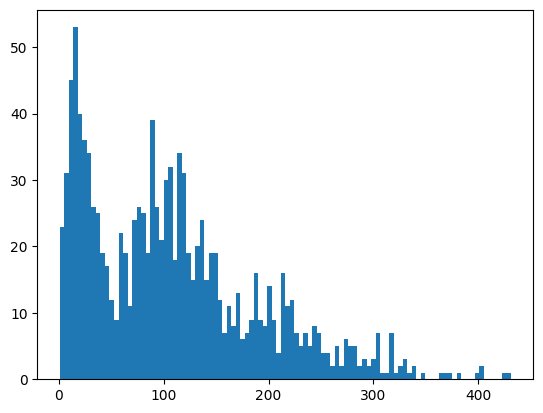

In [5]:
plt.hist(Y_train, bins = 100)

#### - 결측치 시각화

$Expected \ Output:$

![image](fig/1_2.png)

$Expected \ Output:$

![image](fig/1_3.png)

In [6]:
X_train.isna().sum()

hour                       0
hour_bef_temperature       2
hour_bef_precipitation     2
hour_bef_windspeed         8
hour_bef_humidity          2
hour_bef_visibility        2
hour_bef_ozone            57
hour_bef_pm10             69
hour_bef_pm2.5            88
dtype: int64

<Axes: >

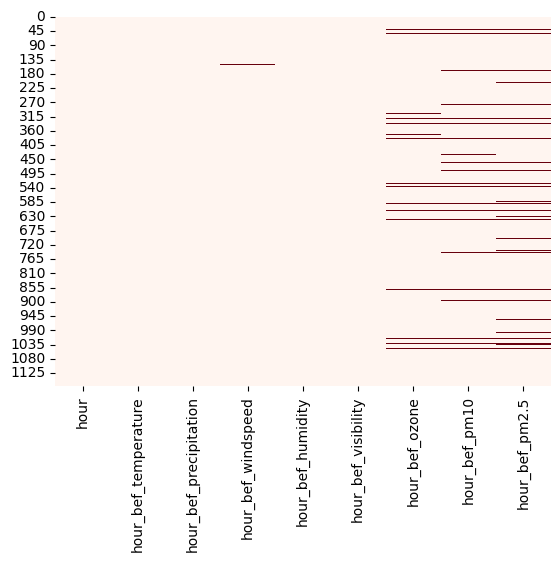

In [7]:
sns.heatmap(X_train.isna(), cbar = False, cmap = 'Reds')

In [8]:
X_test.isna().sum()

hour                       0
hour_bef_temperature       0
hour_bef_precipitation     0
hour_bef_windspeed         1
hour_bef_humidity          0
hour_bef_visibility        0
hour_bef_ozone            19
hour_bef_pm10             21
hour_bef_pm2.5            29
dtype: int64

<Axes: >

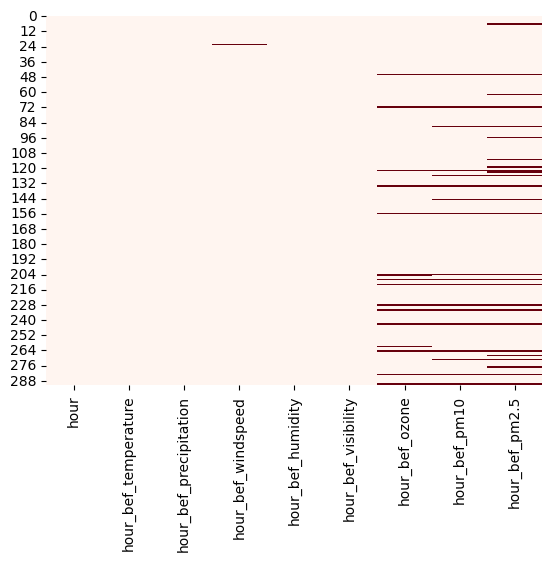

In [9]:
sns.heatmap(X_test.isna(), cbar = False, cmap = 'Reds')

#### - 입력변수 값 범위

- 스케일링 전

$Expected \ Output:$

![image](fig/1_4.png)

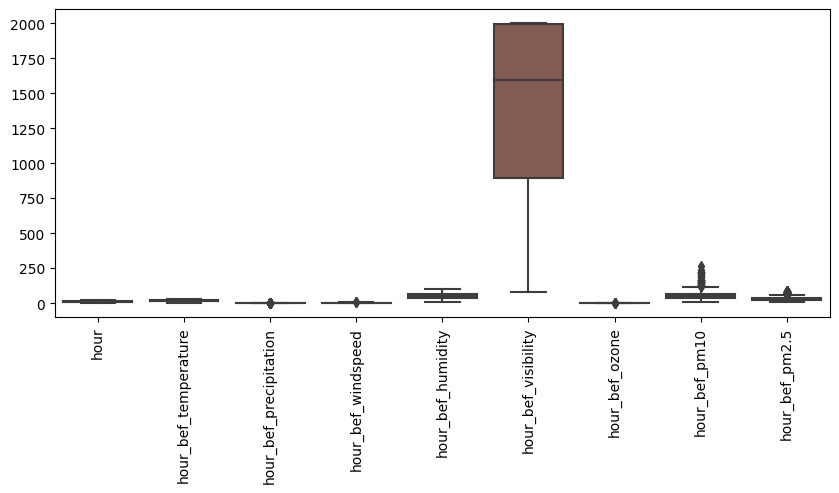

In [10]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.boxplot(X_train)
plt.show()

- 스케일링 후
  - 스케일링 기법 자유롭게 선택

$Expected \ Output:$

![image](fig/1_5.png)

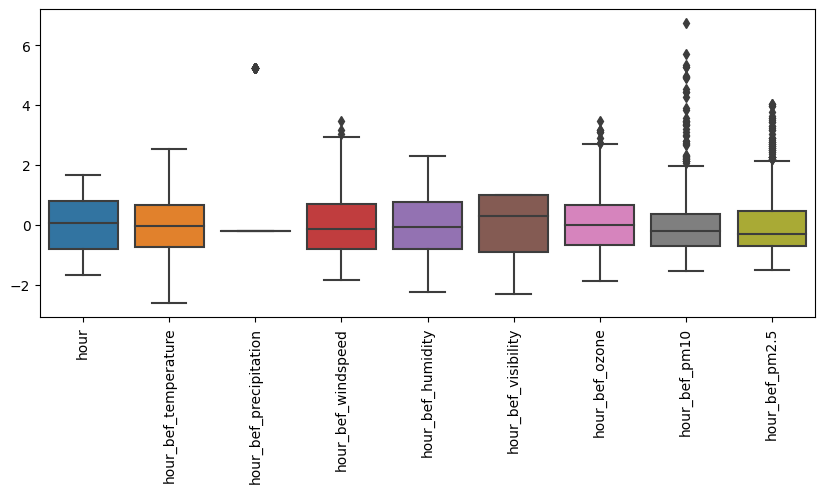

In [11]:
#StandardScaler를 사용하여 z-score 변환
scaler = StandardScaler()
scaler.fit(X_train)

# 스케일링된 데이터를 데이터프레임으로 변환 (컬럼 이름 유지)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)

# z-score 변환된 데이터를 사용하여 박스플롯 그리기
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.boxplot(X_train)
plt.show()

#### - 상관관계

- 전체 상관계수 히트맵
    - 상관계수에 절댓값을 씌워야 음의 상관계수도 고려할 수 있음

$Expected \ Output:$

![image](fig/1_6.png)

<Axes: >

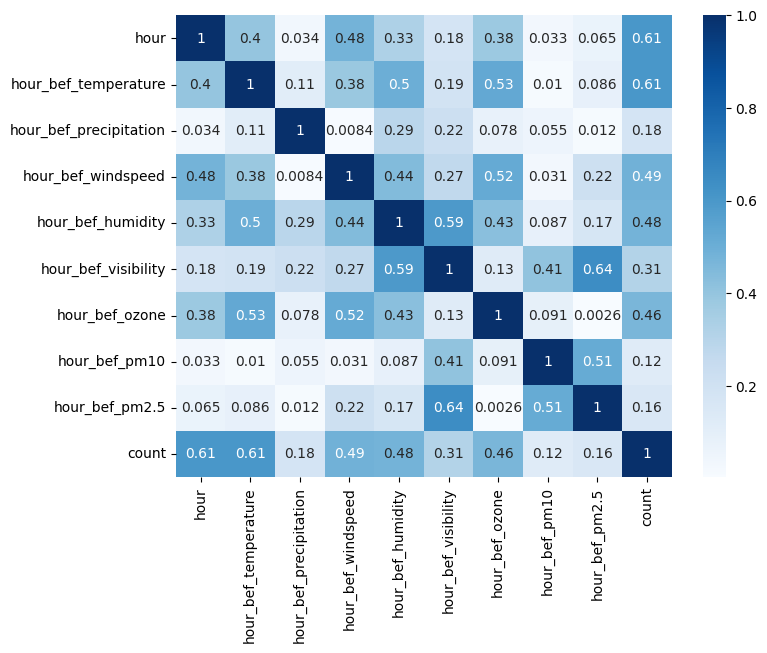

In [12]:
# 상관 계수를 Heatmap으로 표현
corr = np.abs(train.corr())
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues')

- 출력변수와 상관계수가 가장 높은 입력변수의 상관성

$Expected \ Output:$

![image](fig/1_7.png)

In [13]:
corr['count']

hour                      0.605771
hour_bef_temperature      0.605316
hour_bef_precipitation    0.180252
hour_bef_windspeed        0.486371
hour_bef_humidity         0.479644
hour_bef_visibility       0.313437
hour_bef_ozone            0.462627
hour_bef_pm10             0.124682
hour_bef_pm2.5            0.157292
count                     1.000000
Name: count, dtype: float64

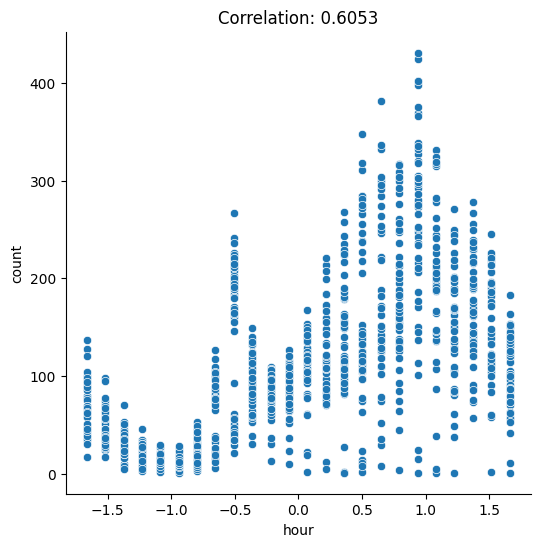

In [14]:
plt.figure(figsize = (6, 6))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel("hour")
plt.ylabel("count")
plt.title("Correlation: %.4f" %(np.round(corr['count'][1], 4)))
sns.scatterplot(x = X_train['hour'], y = Y_train)
plt.show()

- 모든 변수들간의 상관성

$Expected \ Output:$

![image](fig/1_8.png)

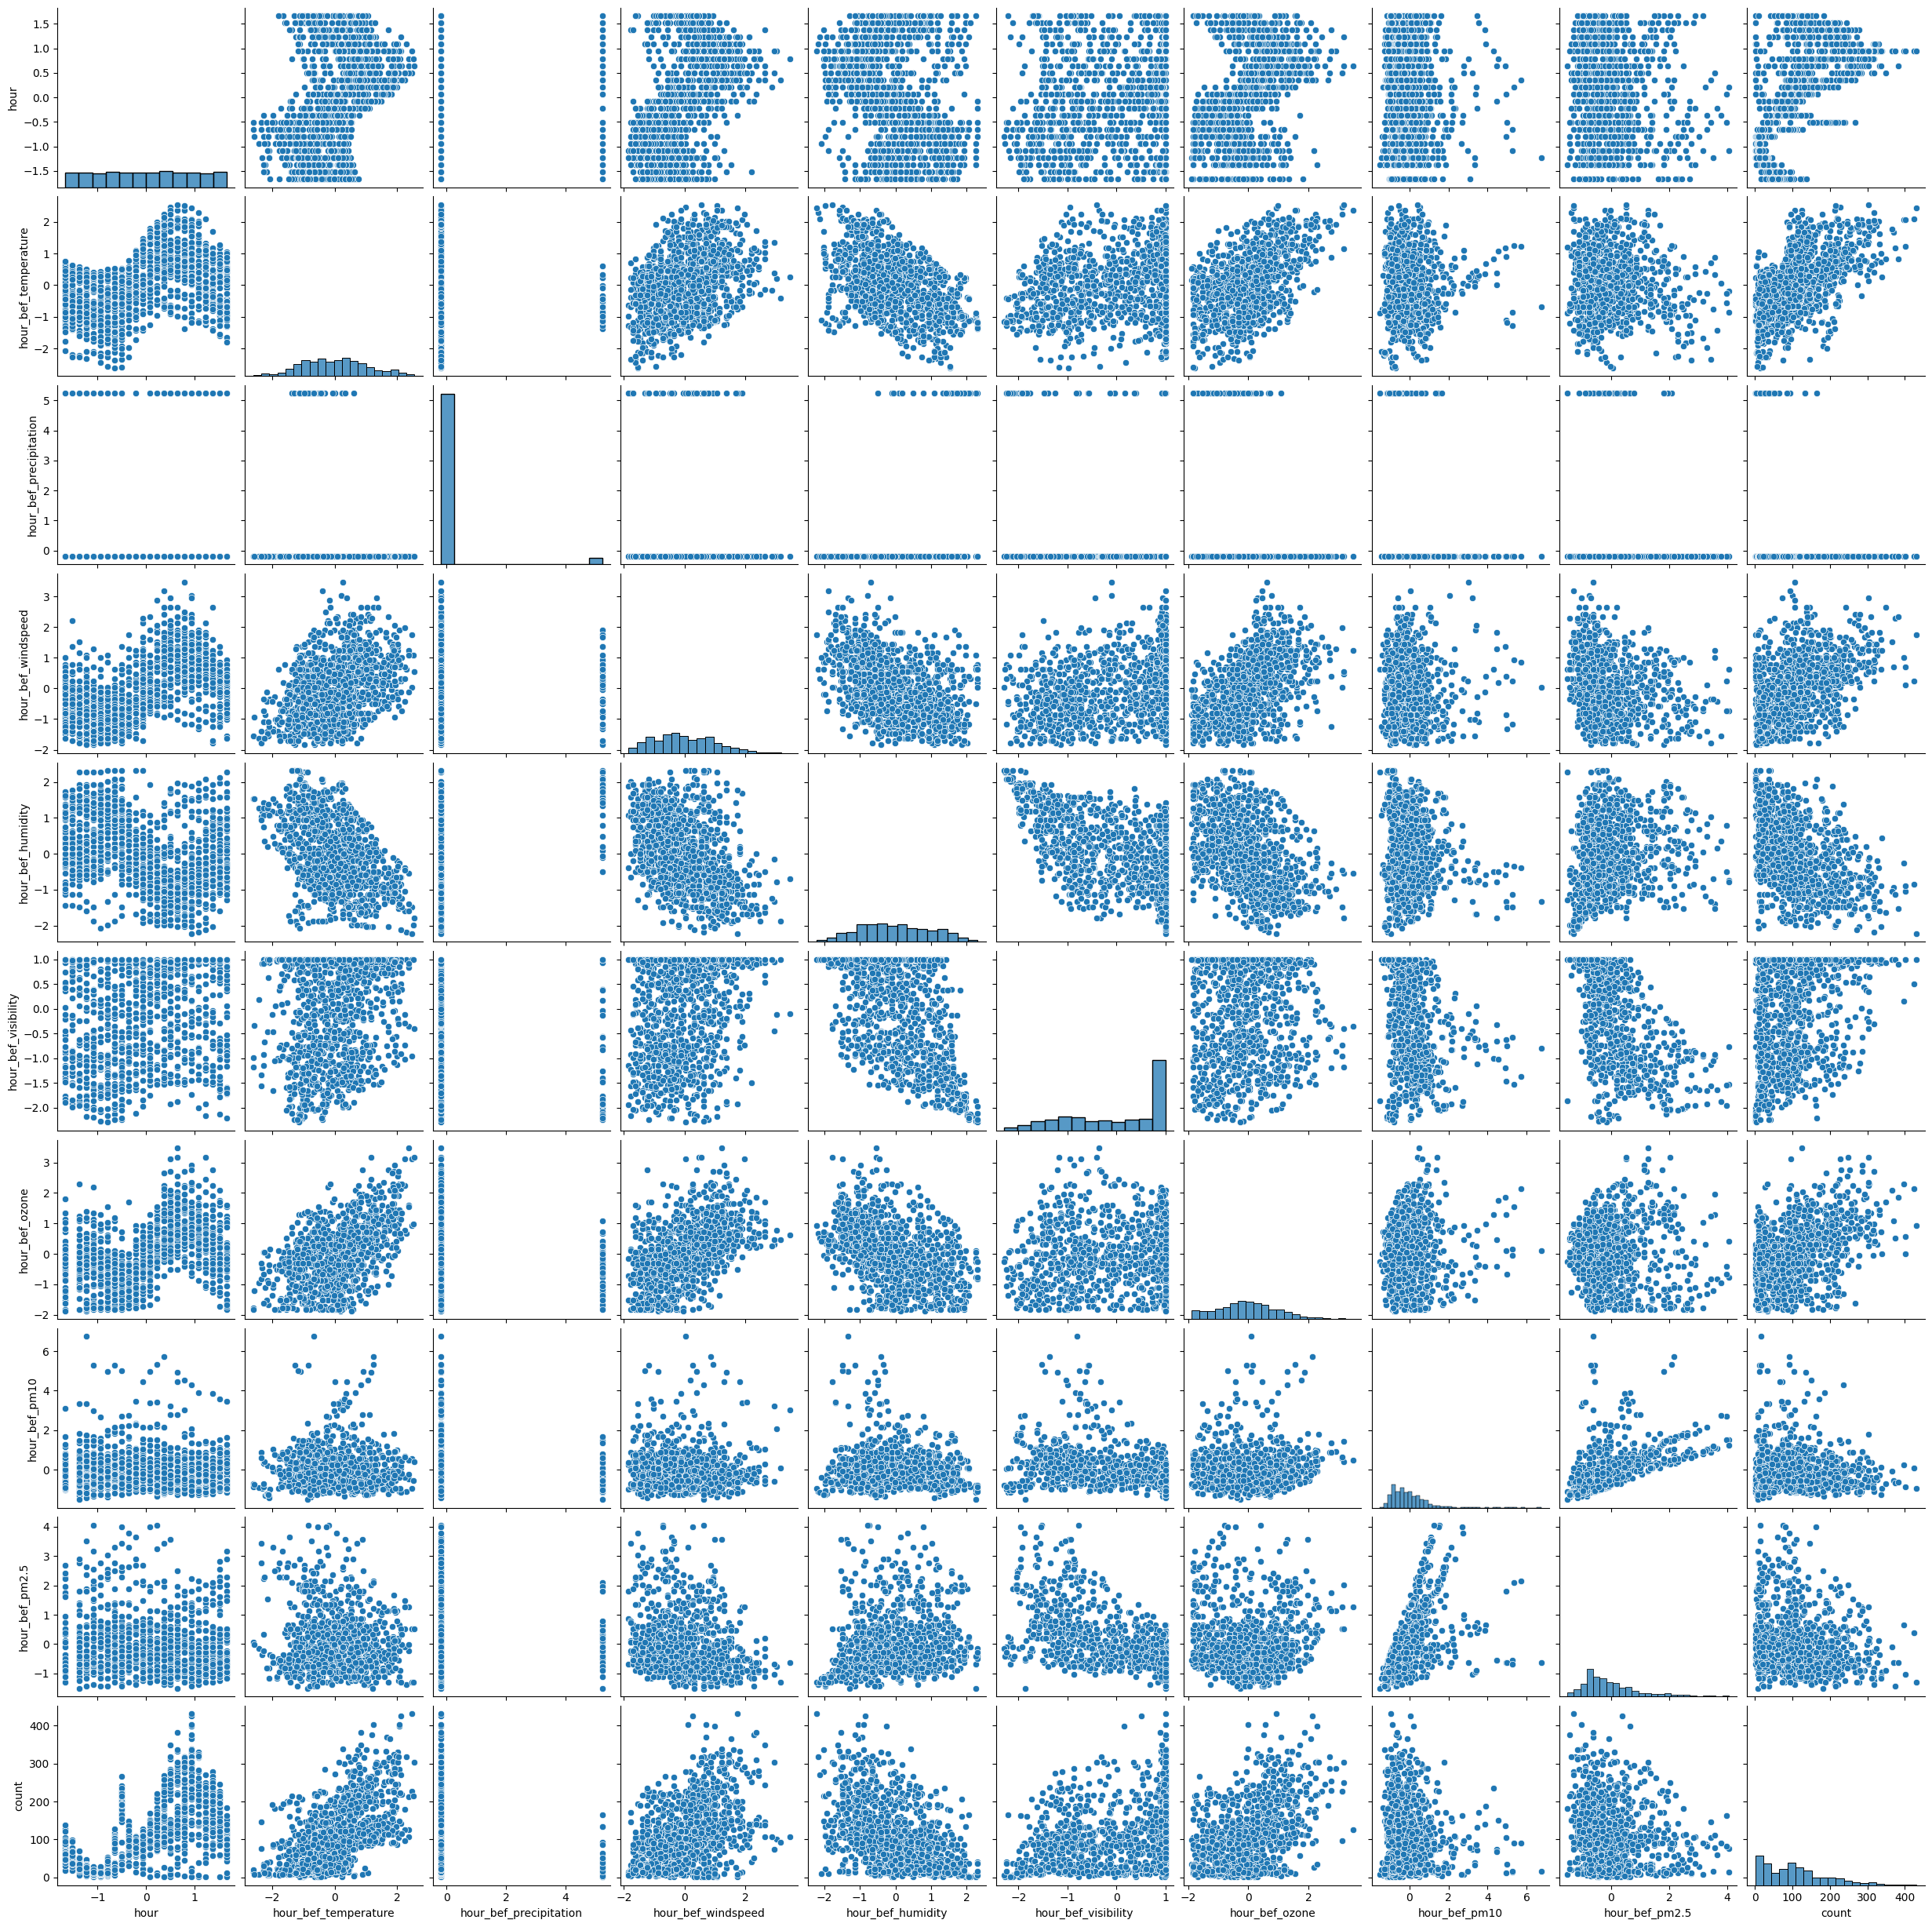

In [15]:
sns.pairplot(pd.concat([X_train, Y_train],axis = 1))

## • Preprocessing

- 전처리는 각자의 전처리 아이디어를 반영하여 진행

In [16]:
train = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/train_set_1.csv')
X_test = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/test_X_1.csv')

In [17]:
# 행별 결측치 개수 관측
train.isna().sum(axis = 1).value_counts()

0    1068
3      49
1      31
2      16
8       2
4       1
Name: count, dtype: int64

In [18]:
# 결측치가 8개인 행 삭제
train.drop(train.loc[(train.isna().sum(axis = 1) == 8)].index, inplace = True)
train.reset_index(drop=True, inplace=True)

# 나머지 결측치에 대해서는, 데이터의 중앙값으로 대체
train.fillna(train.median(), inplace = True)
X_test.fillna(X_test.median(), inplace = True)
train_n = train
X_test_n = X_test

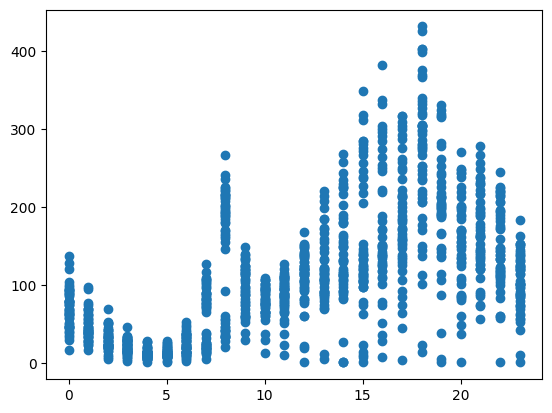

In [19]:
# hour 변수 분포 파악
plt.scatter(train['hour'], train['count'])

In [20]:
# 정수형 hour 데이터를 one-hot encoding을 이용하여 이진 벡터의 값으로 변환
train = pd.concat([pd.get_dummies(train['hour']), train], axis = 1)
train = train.drop(['hour'], axis = 1)
X_test = pd.concat([pd.get_dummies(X_test['hour']), X_test], axis = 1)
X_test = X_test.drop(['hour'], axis = 1)

In [21]:
# 0~23까지의 열 이름만 선택하여 정수형(int)으로 변환 -> OLS를 위한 준비과정
columns_to_convert = [i for i in range(24)]  # '0', '1', ..., '23' 열 이름 생성

# 해당 열들만 정수형으로 변환하고 나머지 열은 유지
train[columns_to_convert] = train[columns_to_convert].astype(int)
X_test[columns_to_convert] = X_test[columns_to_convert].astype(int)


In [22]:
train.columns = train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

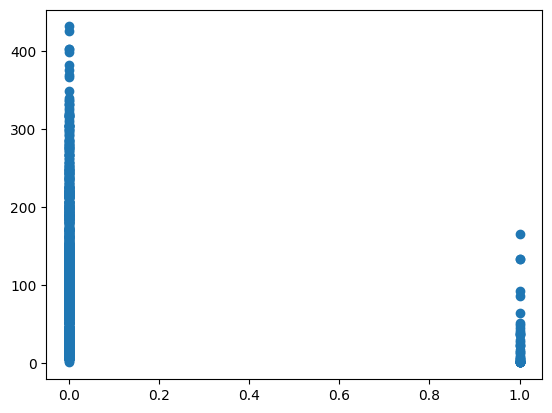

In [23]:
plt.scatter(train['hour_bef_precipitation'], train['count'])

# hour_bef_percipitation은 0, 1의 값만을 갖는 변수임을 확인

In [24]:
# 이진 hour 데이터를 category형 데이터로 변환
for i in range(24):
  train[str(i)] = train[str(i)].astype('category').values
  X_test[str(i)] = X_test[str(i)].astype('category').values

# 이진 hour_bef_precipitation 데이터를 category형 데이터로 변환
train['hour_bef_precipitation'] = train['hour_bef_precipitation'].astype('category').values 
X_test['hour_bef_precipitation'] = X_test['hour_bef_precipitation'].astype('category').values
train_n['hour_bef_precipitation'] = train_n['hour_bef_precipitation'].astype('category').values
X_test_n['hour_bef_precipitation'] = X_test_n['hour_bef_precipitation'].astype('category').values

In [25]:
X_train = train.drop('count', axis = 1)
Y_train = train['count']
X_train_n = train_n.drop('count', axis = 1)
Y_train_n = train_n['count']

In [26]:
# category형 데이터를 제외한 상태로 MinMaxScaler 활용하여 Scaling

scaler = MinMaxScaler()

X_numbers = X_train.select_dtypes(exclude = 'category') 
scaler.fit(X_numbers)
X_numbers = pd.DataFrame(scaler.transform(X_numbers), columns = X_numbers.columns)
X_train = pd.concat([X_train.select_dtypes(exclude = 'float64'), X_numbers], axis = 1)

X_test_numbers = X_test.select_dtypes(exclude = 'category')
scaler.fit(X_test_numbers)
X_test_numbers = pd.DataFrame(scaler.transform(X_test_numbers), columns = X_test_numbers.columns)
X_test = pd.concat([X_test.select_dtypes(exclude = 'float64'), X_test_numbers], axis = 1)

X_numbers_n = X_train_n.select_dtypes(exclude = 'category')
scaler.fit(X_numbers_n)
X_numbers_n = pd.DataFrame(scaler.transform(X_numbers_n), columns = X_numbers_n.columns)
X_train_n = pd.concat([X_train_n.select_dtypes(exclude = 'float64'), X_numbers_n], axis = 1)

X_test_numbers_n = X_test_n.select_dtypes(exclude = 'category')
scaler.fit(X_test_numbers_n)
X_test_numbers_n = pd.DataFrame(scaler.transform(X_test_numbers_n), columns = X_test_numbers_n.columns)
X_test_n = pd.concat([X_test_n.select_dtypes(exclude = 'float64'), X_test_numbers_n], axis = 1)

## • Feature Selection

- 상관계수, VIF 등 각자의 변수선택 기법을 사용하여 변수 선택 진행

In [27]:
# 상관계수를 통한 과적합 판단
corr_train = pd.concat((X_train, Y_train), axis=1)
corr = np.abs(corr_train.corr()['count'][:-1])
corr

0                         0.096244
1                         0.148011
2                         0.190104
3                         0.225157
4                         0.240100
5                         0.230531
6                         0.213835
7                         0.131761
8                         0.090911
9                         0.029479
10                        0.070705
11                        0.053876
12                        0.006694
13                        0.025654
14                        0.079380
15                        0.111059
16                        0.162034
17                        0.193938
18                        0.398232
19                        0.209138
20                        0.108659
21                        0.147009
22                        0.102534
23                        0.013221
hour_bef_precipitation    0.180252
hour_bef_temperature      0.605316
hour_bef_windspeed        0.485569
hour_bef_humidity         0.479644
hour_bef_visibility 

In [28]:
# OLS를 이용한 T-test
OLS = sm.OLS(Y_train, X_train).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     109.6
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          5.67e-315
Time:                        20:09:08   Log-Likelihood:                -5991.8
No. Observations:                1165   AIC:                         1.205e+04
Df Residuals:                    1133   BIC:                         1.221e+04
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
0                         20.4550     15.730      1.300      0.194     -10.407      51.317
1                         -0.5809     15.620     -0.037      0.970     -31.227      30.066
2                         -9.8322     15.748     -0.624      0.533     -40.732      21.067
3                        -16.5594     15.633     -1.059      0.290     -47.233      14.114
4                        -23.2866     15.528     -1.500      0.134     -53.754       7.181
5                        -20.0782     15.463     -1.298      0.194     -50.418      10.261
6                         -6.8252     15.185     -0.449      0.653     -36.620      22.970
7                         30.7296     15.094      2.036      0.042       1.115      60.345
8                        113.4898     14.767      7.685      0.000      84.516     142.463
9                         50.0048     14.978      3.338      0.001      20.616      79.393
10                        22.2621     15.005      1.484      0.138      -7.178      51.702
11                        15.8393     15.154      1.045      0.296     -13.893      45.572
12                        29.8740     15.454      1.933      0.053      -0.449      60.197
13                        25.9595     16.114      1.611      0.107      -5.658      57.577
14                        44.1968     16.146      2.737      0.006      12.517      75.876
15                        50.3196     16.344      3.079      0.002      18.253      82.387
16                        74.8981     16.453      4.552      0.000      42.617     107.179
17                        89.7636     16.719      5.369      0.000      56.959     122.568
18                       167.1837     16.690     10.017      0.000     134.438     199.930
19                       107.3124     16.488      6.509      0.000      74.963     139.662
20                        79.9195     16.401      4.873      0.000      47.740     112.099
21                        96.6731     16.455      5.875      0.000      64.386     128.960
22                        86.7254     16.051      5.403      0.000      55.233     118.218
23                        47.0658     15.834      2.972      0.003      15.999      78.133
hour_bef_precipitation   -59.5555      7.413     -8.034      0.000     -74.100     -45.011
hour_bef_temperature     136.0458      9.077     14.988      0.000     118.237     153.855
hour_bef_windspeed        19.4980      9.473      2.058      0.040       0.912      38.084
hour_bef_humidity        -29.0337     10.166     -2.856      0.004     -48.981      -9.087
hour_bef_visibility       11.3594      7.611      1.492      0.136      -3.574      26.293
hour_bef_ozone            24.0372      9.700      2.478      0.013       5.005      43.070
hour_bef_pm10            -74.8251     13.311     -5.621      0.000    -100.943  

In [29]:
# p-value가 높은 변수 제거
X_train = X_train.drop(['hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm2.5'], axis = 1) 
OLS = sm.OLS(Y_train, X_train).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          1.15e-316
Time:                        20:09:09   Log-Likelihood:                -5995.2
No. Observations:                1165   AIC:                         1.205e+04
Df Residuals:                    1136   BIC:                         1.220e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
0                         45.6555      8.974      5.088      0.000      28.048      63.263
1                         23.7069      9.343      2.537      0.011       5.375      42.039
2                         14.7309      9.163      1.608      0.108      -3.248      32.710
3                          8.1158      9.013      0.900      0.368      -9.568      25.800
4                          0.5645      9.174      0.062      0.951     -17.436      18.565
5                          3.1206      9.225      0.338      0.735     -14.979      21.220
6                         16.0224      9.092      1.762      0.078      -1.816      33.861
7                         53.8543      8.919      6.038      0.000      36.355      71.354
8                        137.0308      8.650     15.841      0.000     120.058     154.003
9                         74.0242      9.028      8.199      0.000      56.311      91.738
10                        46.2136      9.147      5.052      0.000      28.267      64.160
11                        41.4615      8.984      4.615      0.000      23.835      59.088
12                        55.9251      9.270      6.033      0.000      37.737      74.113
13                        53.4951      9.687      5.522      0.000      34.489      72.502
14                        71.7427      9.802      7.319      0.000      52.511      90.974
15                        78.9656      9.846      8.020      0.000      59.647      98.285
16                       103.1592     10.160     10.153      0.000      83.224     123.094
17                       118.9124     10.006     11.884      0.000      99.279     138.545
18                       196.5281      9.849     19.955      0.000     177.204     215.852
19                       135.6847      9.861     13.760      0.000     116.337     155.032
20                       108.2360      9.623     11.248      0.000      89.355     127.116
21                       124.7130      9.388     13.285      0.000     106.294     143.132
22                       113.4529      9.139     12.414      0.000      95.521     131.385
23                        73.0657      9.000      8.118      0.000      55.407      90.724
hour_bef_precipitation   -60.6079      7.368     -8.226      0.000     -75.065     -46.151
hour_bef_temperature     131.4541      8.907     14.758      0.000     113.977     148.931
hour_bef_humidity        -41.8126      7.354     -5.685      0.000     -56.242     -27.383
hour_bef_ozone            26.4285      9.358      2.824      0.005       8.068      44.789
hour_bef_pm10            -84.4758     10.682     -7.909      0.000    -105.434     -63.518
==============================================================================
Omnibus:                       79.267   Durbin-Watson:                   1.920
Prob(Omnibus)

In [30]:
# VIF를 통한 다중공선성 판단
V = pd.DataFrame() 
data = X_train.select_dtypes(exclude = 'category')
V['column'] = data.columns
V['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
V
# 다중공선성 위험 데이터는 없음

,column,VIF
0,hour_bef_temperature,7.467092
1,hour_bef_humidity,2.908726
2,hour_bef_ozone,6.336139
3,hour_bef_pm10,3.079956


In [31]:
# 위의 모델으로 확정, Test 데이터 가공
predict = OLS.predict(X_train) 
X_train_n = X_train_n.drop(['hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm2.5'], axis = 1)
X_test = X_test.drop(['hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm2.5'], axis = 1)
X_test_n = X_test_n.drop(['hour_bef_windspeed', 'hour_bef_visibility', 'hour_bef_pm2.5'], axis = 1)

## • Modeling

**평가지표**:

- 모든 모델의 평가지표는 $MSE$로 함

### - Linear Regression

- `statsmodels` 패키지의 `OLS` 사용

> **⚠️ 주의사항**: 평가지표는 $R^2$가 아닌 $MSE$로 함

In [32]:
OLS = sm.OLS(Y_train, X_train).fit()
OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     120.7
Date:                Sat, 12 Oct 2024   Prob (F-statistic):          1.15e-316
Time:                        20:09:09   Log-Likelihood:                -5995.2
No. Observations:                1165   AIC:                         1.205e+04
Df Residuals:                    1136   BIC:                         1.220e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
0                         45.6555      8.974      5.088      0.000      28.048      63.263
1                         23.7069      9.343      2.537      0.011       5.375      42.039
2                         14.7309      9.163      1.608      0.108      -3.248      32.710
3                          8.1158      9.013      0.900      0.368      -9.568      25.800
4                          0.5645      9.174      0.062      0.951     -17.436      18.565
5                          3.1206      9.225      0.338      0.735     -14.979      21.220
6                         16.0224      9.092      1.762      0.078      -1.816      33.861
7                         53.8543      8.919      6.038      0.000      36.355      71.354
8                        137.0308      8.650     15.841      0.000     120.058     154.003
9                         74.0242      9.028      8.199      0.000      56.311      91.738
10                        46.2136      9.147      5.052      0.000      28.267      64.160
11                        41.4615      8.984      4.615      0.000      23.835      59.088
12                        55.9251      9.270      6.033      0.000      37.737      74.113
13                        53.4951      9.687      5.522      0.000      34.489      72.502
14                        71.7427      9.802      7.319      0.000      52.511      90.974
15                        78.9656      9.846      8.020      0.000      59.647      98.285
16                       103.1592     10.160     10.153      0.000      83.224     123.094
17                       118.9124     10.006     11.884      0.000      99.279     138.545
18                       196.5281      9.849     19.955      0.000     177.204     215.852
19                       135.6847      9.861     13.760      0.000     116.337     155.032
20                       108.2360      9.623     11.248      0.000      89.355     127.116
21                       124.7130      9.388     13.285      0.000     106.294     143.132
22                       113.4529      9.139     12.414      0.000      95.521     131.385
23                        73.0657      9.000      8.118      0.000      55.407      90.724
hour_bef_precipitation   -60.6079      7.368     -8.226      0.000     -75.065     -46.151
hour_bef_temperature     131.4541      8.907     14.758      0.000     113.977     148.931
hour_bef_humidity        -41.8126      7.354     -5.685      0.000     -56.242     -27.383
hour_bef_ozone            26.4285      9.358      2.824      0.005       8.068      44.789
hour_bef_pm10            -84.4758     10.682     -7.909      0.000    -105.434     -63.518
==============================================================================
Omnibus:                       79.267   Durbin-Watson:                   1.920
Prob(Omnibus)

In [33]:
mean_squared_error(Y_train, predict)

1727.394477733277

In [34]:
reg_result = {}
reg_result['MLR'] = OLS.predict(X_test).values
print(OLS.predict(X_test))

0      169.535108
1       82.011811
2        7.678463
3      120.372164
4      142.294261
          ...    
287     44.322951
288    186.916249
289    246.426479
290     72.246971
291     -9.697613
Length: 292, dtype: float64


### - Ridge and Lasso Regression

- **하이퍼파라미터 후보**:
    - `alpha` = [0.001, 0.01, 0.1, 1, 10]

In [35]:
# K=10인 K-Fold Cross Validation 실행행
kfold = KFold(n_splits=10, shuffle=False)

Rid = []
Las = []
alpha = [0.001, 0.01, 0.1, 1, 10]

for i in alpha:
  r = Ridge(alpha = i)
  l = Lasso(alpha = i)
  ridge_cv = cross_validate(r, X_train, Y_train, cv = kfold, scoring = 'neg_mean_squared_error')
  lasso_cv = cross_validate(l, X_train, Y_train, cv = kfold, scoring = 'neg_mean_squared_error')
  Rid.append(np.mean(-1 * ridge_cv['test_score']))
  Las.append(np.mean(-1 * lasso_cv['test_score']))

In [36]:
result = pd.DataFrame({'Ridge':Rid, 'Lasso':Las}, index=alpha)
result

,Ridge,Lasso
0.001,1814.490515,1814.436066
0.010,1814.467045,1814.479850
0.100,1814.253762,1821.872971
1.000,1814.107919,2365.822807
10.000,1923.073596,6871.795657


In [37]:
print("Ridge")
ridge_final = Ridge(alpha= alpha[np.argmin(Rid)]).fit(X_train, Y_train)
reg_result['Ridge'] = ridge_final.predict(X_test)
print(reg_result['Ridge'])
print("Lasso")
lasso_final = Lasso(alpha= alpha[np.argmin(Las)]).fit(X_train, Y_train)
reg_result['Lasso'] = lasso_final.predict(X_test)
print(reg_result['Lasso'])

Ridge
[168.77053459  82.82658797   8.44408515 119.5572016  141.7334955
  55.00556136  44.69944498 211.62971759  45.27634035  -7.43565623
 118.64805485 191.12370549  59.13898429 117.91249644  60.88877831
 139.8883869  132.90634637 183.89041681  98.82320859 155.55481825
 129.86554769  98.34317175 166.41854365  96.39088004  12.84878188
 124.45836672 196.38584101 149.45073479 161.85091711 172.83210732
 107.53806749 212.74690725  84.96663663  86.73468468  70.88028982
 136.1808524   89.76754748  20.15600223 120.78316307  87.19918424
  42.50855193  48.0132444  179.52318989  39.64692992 173.78738676
  32.87759432 -38.90682394 240.34692602  66.75368137 241.9240375
  96.51732518  60.53369472 227.07029895 108.35745916  -4.80281165
 -11.20920999 197.29498821 131.87525528 170.02286167  91.03913733
 202.20992331  55.09888563 -27.59543111  52.03725612  37.29584511
 195.43085214  25.91847325 146.86667742  39.53961472  18.17785309
  55.97547964  84.48917644  54.013221    -4.11997681 149.06528164
 134.7

### - Decision Tree Regression

- 의사결정나무의 하이퍼파라미터 튜닝은 sklearn의 `RandomizedSearchCV`을 기본으로 함 ([하이퍼파라미터 튜닝 참고](https://dacon.io/codeshare/4568?page&dtype&ptype))

> **⚠️ 주의사항**: `GridSearchCV`는 search space가 클 경우 매우 오래걸림

- **하이퍼파라미터 후보**:
    - `max_depth` = [None, 1, 5, 10, 50]
    - `max_leaf_nodes` = [None, 2, 5, 10, 50]
    - `max_features` = [None, 0.2, 0.4, 0.6, 0.8, 1.0]
    - `min_samples_split` = [0.2, 0.4, 0.6, 0.8, 1.0]
    - `min_samples_leaf` = [0.1, 0.3, 0.5, 0.7, 0.9]
- 하이퍼파라미터 튜닝 평가지표: `scoring='neg_mean_squared_error'`
    - `neg_mean_squared_error`는 $MSE$가 음수로 나오기 때문에 양수로 변환시켜야함

> **주의사항**:
> 
> 의사결정나무 모델 생성시 시드 설정
> ```python
> >>> dt = DecisionTreeRegressor(..., random_state=RANDOM_SEED)  # RANDOM_SEED = 42
> ```

In [38]:
dt = DecisionTreeRegressor(random_state = 42)
parameter = { 'max_depth' : [None, 1, 5, 10, 50],
    'max_leaf_nodes' : [None, 2, 5, 10, 50],
    'max_features' : [None, 0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_split' : [0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_leaf' : [0.1, 0.3, 0.5, 0.7, 0.9]}

rand = RandomizedSearchCV(dt, param_distributions = parameter, n_iter = 625, cv = kfold, scoring = 'neg_mean_squared_error', refit = True)
rand.fit(X_train_n, Y_train_n)
print("Best Params: ", rand.best_params_)
print("Best Score: ", -1 * rand.best_score_)
reg_result['Decision Tree Regression'] = rand.predict(X_test_n)

Best Params:  {'min_samples_split': 0.2, 'min_samples_leaf': 0.1, 'max_leaf_nodes': None, 'max_features': 0.8, 'max_depth': 10}
Best Score:  2878.6097412692206


In [39]:
pd.DataFrame(reg_result).to_csv('C:/Users/symply_jina/Desktop/1차 과제/2021190002_장서현_regression.csv', index=False)

## 2) Classification

### • Dataset

In [92]:
train2 = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/train_set_2.csv')
X_test2 = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/test_X_2.csv')

In [93]:
# 종속 변수 분리 (이상치 제거 전)
Y_train2 = train2['type'].apply(lambda x: 1 if x == 'red' else 0)  # 'red'를 1로, 나머지를 0으로 변환

# 이상치 제거 전, 종속 변수 분리
X_train2 = train2.drop(['type'], axis=1)  # type 변수를 제거한 X_train

### • EDA (Exploratory Data Analysis)

#### - 클래스 균형 시각화

$Expected \ Output:$

- `red`, `white` 순서 상관없음

![image](fig/2_1.png)

<Axes: xlabel='type', ylabel='count'>

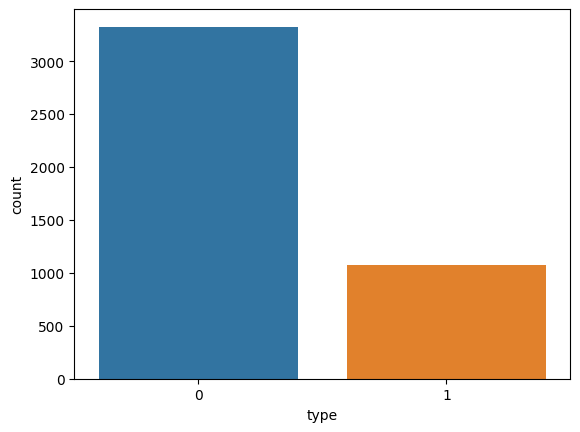

In [94]:
sns.countplot(x = Y_train2)

#### - 결측치 시각화


$Expected \ Output:$

![image](fig/2_2.png)

$Expected \ Output:$

![image](fig/2_3.png)

In [95]:
X_train2.isna().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

<Axes: >

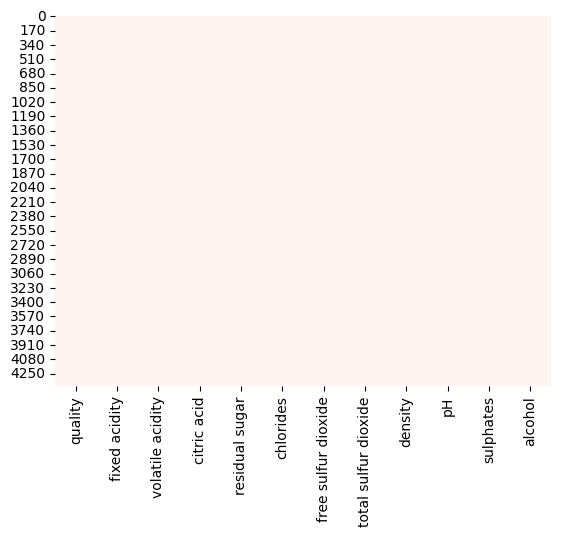

In [96]:
sns.heatmap(X_train2.isna(), cbar = False, cmap = 'Reds')

In [97]:
X_test2.isna().sum()

quality                 0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

<Axes: >

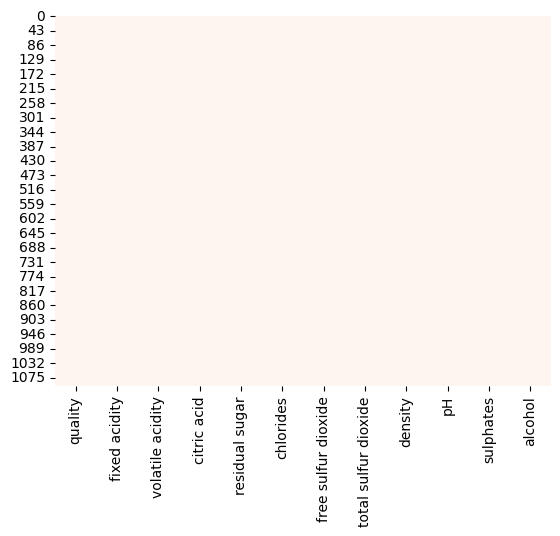

In [98]:
sns.heatmap(X_test2.isna(), cbar = False, cmap = 'Reds')

#### - 입력변수 값 범위

- 스케일링 전

$Expected \ Output:$

![image](fig/2_4.png)

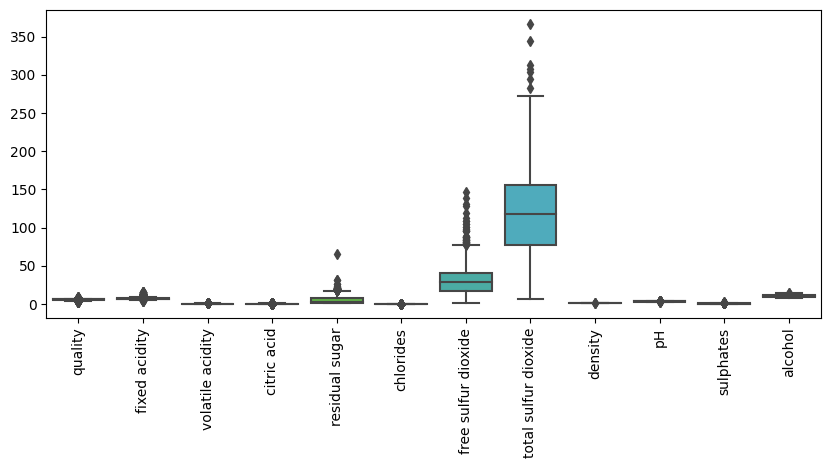

In [99]:
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.boxplot(X_train2)
plt.show()

- 스케일링 후
  - 스케일링 기법 자유롭게 선택
  
$Expected \ Output:$

![image](fig/2_5.png)

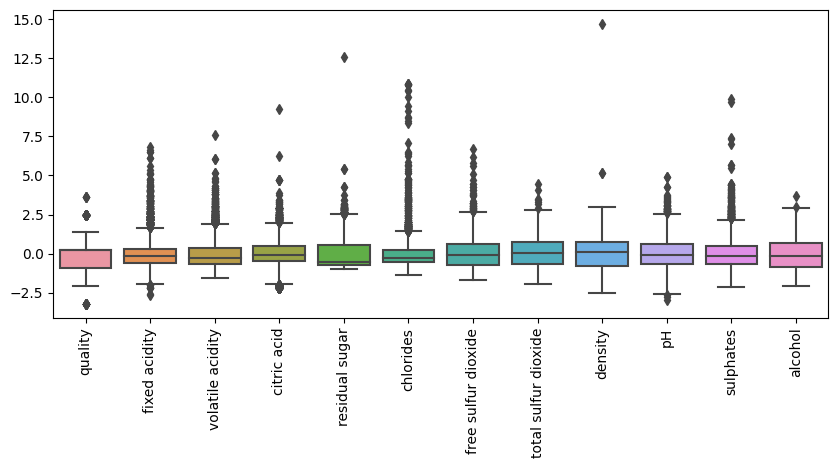

In [100]:
scaler = StandardScaler()
scaler.fit(X_train2)
X_train2 = pd.DataFrame(scaler.transform(X_train2), columns = X_train2.columns)

plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.boxplot(X_train2)
plt.show()

#### 상관관계

- 전체 상관계수 히트맵

$Expected \ Output:$

![image](fig/2_6.png)

<Axes: >

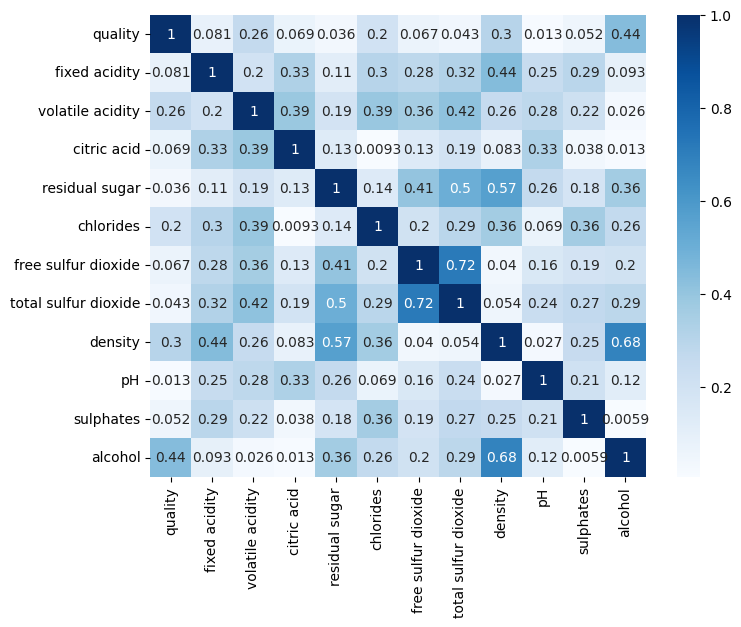

In [101]:
corr = np.abs(X_train2.corr())
plt.figure(figsize = (8, 6))
sns.heatmap(corr, annot = True, cmap = 'Blues')

## • Preprocessing

- 전처리는 각자의 아이디어를 반영하여 진행

In [102]:
train2 = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/train_set_2.csv')
X_test2 = pd.read_csv('C:/Users/symply_jina/Desktop/1차 과제/data/test_X_2.csv')

In [103]:
# IQR을 사용하여 이상치 제거 함수 정의
def remove_outliers_iqr(df, columns):
    """
    입력된 데이터프레임(df)에서 지정된 열(columns)에 대해 IQR 방식을 이용하여 이상치를 제거하는 함수.
    """
    for column in columns:
        # IQR 계산
        Q1 = df[column].quantile(0.25)  # 1사분위수 (25%)
        Q3 = df[column].quantile(0.75)  # 3사분위수 (75%)
        IQR = Q3 - Q1  # IQR 계산

        # 이상치의 경계값 설정
        lower_bound = Q1 - 3 * IQR
        upper_bound = Q3 + 3 * IQR

        # 이상치가 아닌 데이터만 남김
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

In [104]:
# 종속 변수 분리 (이상치 제거 전)
Y_train2 = train2['type'].apply(lambda x: 1 if x == 'red' else 0)  # 'red'를 1로, 나머지를 0으로 변환

# 이상치 제거 전, 종속 변수 분리
X_train2 = train2.drop(['type'], axis=1)  # type 변수를 제거한 X_train

In [105]:
# quality 데이터를 제외하고 StandardScaler 활용하여 Scaling
X_numbers2 = X_train2.select_dtypes(exclude='int64') 

# StandardScaler 적용
scaler = StandardScaler()
scaler.fit(X_numbers2)
X_numbers2 = pd.DataFrame(scaler.transform(X_numbers2), columns=X_numbers2.columns)

# 인덱스를 초기화한 후 병합하여 인덱스가 어긋나지 않도록 함
X_train2 = X_train2.reset_index(drop=True)
X_numbers2 = X_numbers2.reset_index(drop=True)

# 스케일링된 데이터와 다른 변수 병합 (인덱스 초기화 후)
X_train2 = pd.concat([X_train2.select_dtypes(exclude='float64').reset_index(drop=True), 
                     X_numbers2.reset_index(drop=True)], axis=1)

# X_test에 대해 동일한 전처리 수행
X_test_numbers2 = X_test2.select_dtypes(exclude='int64')
scaler.fit(X_test_numbers2)
X_test_numbers2 = pd.DataFrame(scaler.transform(X_test_numbers2), columns=X_test_numbers2.columns)

# 인덱스를 초기화한 후 병합하여 인덱스가 어긋나지 않도록 함
X_test2 = X_test2.reset_index(drop=True)
X_test_numbers2 = X_test_numbers2.reset_index(drop=True)

# 스케일링된 데이터와 다른 변수 병합 (인덱스 초기화 후)
X_test2 = pd.concat([X_test2.select_dtypes(exclude='float64').reset_index(drop=True), 
                    X_test_numbers2.reset_index(drop=True)], axis=1)

In [106]:
X_train2['quality'].value_counts(ascending = True)

quality
9       4
3      20
8     122
4     157
7     749
5    1428
6    1917
Name: count, dtype: int64

In [107]:
X_test2['quality'].value_counts(ascending = True)

quality
9      1
3      6
4     29
8     30
7    175
5    360
6    499
Name: count, dtype: int64

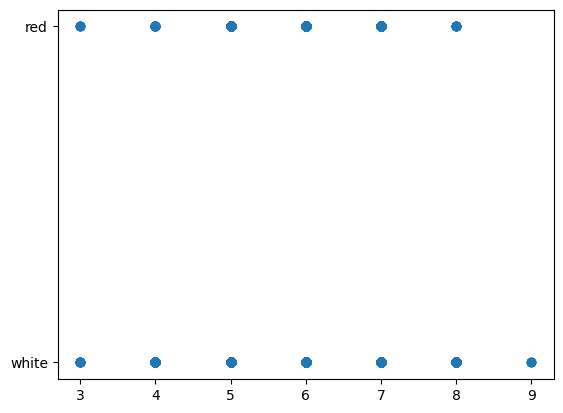

In [108]:
plt.scatter(train2['quality'], train2['type'])


In [109]:
# (3+9)/2 = 6

X_train2['quality'] = X_train2['quality'].apply(lambda x: (x - 6) / 6)
X_test2['quality'] = X_test2['quality'].apply(lambda x: (x - 6) / 6)
X_train2['quality'].value_counts(ascending = True)

quality
 0.500000       4
-0.500000      20
 0.333333     122
-0.333333     157
 0.166667     749
-0.166667    1428
 0.000000    1917
Name: count, dtype: int64

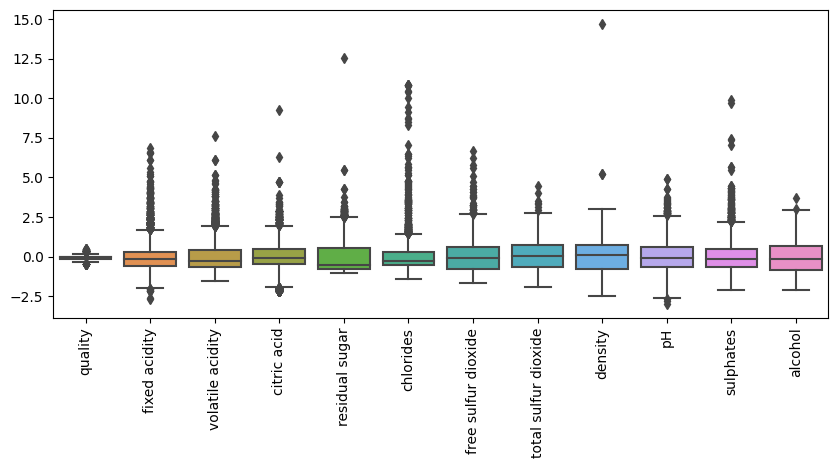

In [110]:
# 데이터 전처리 결과
plt.figure(figsize = (10, 4))
plt.xticks(rotation = 90)
sns.boxplot(X_train2)
plt.show()

## • Feature Selection

- 상관계수, VIF 등 각자의 변수선택 기법을 사용하여 변수 선택 진행

In [111]:
# 상관계수를 통한 과적합 판단
corr_train = pd.concat((X_train2, Y_train2), axis=1) 
corr_abs = np.abs(corr_train.corr()['type'][:-1])
corr_abs

quality                 0.111226
fixed acidity           0.472788
volatile acidity        0.644626
citric acid             0.196671
residual sugar          0.348647
chlorides               0.525568
free sulfur dioxide     0.474750
total sulfur dioxide    0.702426
density                 0.373476
pH                      0.345740
sulphates               0.485436
alcohol                 0.019554
Name: type, dtype: float64

In [112]:
X_train2 = X_train2.drop(['alcohol'], axis = 1)
X_test2 = X_test2.drop(['alcohol'], axis = 1)

In [114]:
V = pd.DataFrame()
V['column'] = X_train2.columns 
V['VIF'] = [variance_inflation_factor(X_train2.values, i) for i in range(X_train2.shape[1])]
V

# 더 이상 제외할 변수 없음을 확인

,column,VIF
0,quality,1.340438
1,fixed acidity,3.126897
2,volatile acidity,1.817672
3,citric acid,1.578258
4,residual sugar,4.451789
5,chlorides,1.635668
6,free sulfur dioxide,2.148102
7,total sulfur dioxide,2.753615
8,density,5.550736
9,pH,1.844076


## • Modeling

> **⚠️ 주의사항**: 분석에 들어가기 전 문자열로 되어있는 출력변수 'type'을 인코딩 시켜야함
> - `'red'`는 1로 변환
> - `'white'`는 0으로 변환

**평가지표**: 모든 분류모델의 평가지표는 $F1 \ Score$으로 함

### - Logistic Regression

- **하이퍼파라미터 후보**:
    - `C` = [0.01, 0.1, 1, 10]

In [115]:
kfold = KFold(n_splits=10, shuffle=False)

log = []
C = [0.01, 0.1, 1, 10]

for i in C:
  logistic = LogisticRegression(C = i)
  logistic_cv = cross_validate(logistic, X_train2, Y_train2, cv = kfold, scoring = 'f1')
  log.append(np.mean(logistic_cv['test_score']))

In [116]:
result2 = pd.DataFrame({'C': C, 'Logistic Regression': log})
result2

,C,Logistic Regression
0,0.01,0.974001
1,0.10,0.978278
2,1.00,0.980197
3,10.00,0.982174


In [117]:
reg_result2 = {}
reg_result2['Logistic'] = LogisticRegression(C = C[np.argmax(log)]).fit(X_train2, Y_train2).predict(X_test2)

### - KNN Classification

- **하이퍼파라미터 후보**:
    - `n_neighbors` = [1, 3, 5, 7]

In [118]:
knn = []
n = [1, 3, 5, 7]

for i in n:
  knc = KNeighborsClassifier(n_neighbors = i)
  knn_cv = cross_validate(knc, X_train2, Y_train2, cv = kfold, scoring = 'f1')
  knn.append(np.mean(knn_cv['test_score']))

In [119]:
result2 = pd.DataFrame({'N': n, 'KNN Classification': knn})
result2

,N,KNN Classification
0,1,0.987323
1,3,0.986901
2,5,0.984801
3,7,0.984580


In [120]:
reg_result2['KNN'] = KNeighborsClassifier(n_neighbors = n[np.argmax(knn)]).fit(X_train2, Y_train2).predict(X_test2)

### - Decision Tree Classification

- 의사결정나무의 하이퍼파라미터 튜닝은 sklearn의 `RandomizedSearchCV`을 기본으로 함 ([하이퍼파라미터 튜닝 참고](https://dacon.io/codeshare/4568?page&dtype&ptype))

> **⚠️ 주의사항**: `GridSearchCV`는 search space가 클 경우 매우 오래걸림

- **하이퍼파라미터 후보**:
    - `max_depth` = [None, 1, 5, 10, 50]
    - `max_leaf_nodes` = [None, 2, 5, 10, 50]
    - `max_features` = [None, 0.2, 0.4, 0.6, 0.8, 1.0]
    - `min_samples_split` = [0.2, 0.4, 0.6, 0.8, 1.0]
    - `min_samples_leaf` = [0.1, 0.3, 0.5, 0.7, 0.9]
- 하이퍼파라미터 튜닝 평가지표: `scoring='f1'`


> **주의사항**:
> 
> 의사결정나무 모델 생성시 시드 설정
> ```python
> >>> dt = DecisionTreeClassifier(..., random_state=RANDOM_SEED)  # RANDOM_SEED = 42
> ```

In [121]:
dt = DecisionTreeClassifier(random_state = 42)
parameter = { 'max_depth' : [None, 1, 5, 10, 50],
    'max_leaf_nodes' : [None, 2, 5, 10, 50],
    'max_features' : [None, 0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_split' : [0.2, 0.4, 0.6, 0.8, 1.0],
    'min_samples_leaf' : [0.1, 0.3, 0.5, 0.7, 0.9]}

rand = RandomizedSearchCV(dt, param_distributions = parameter, n_iter = 625, cv = kfold, scoring = 'f1', refit = True)
rand.fit(X_train2, Y_train2)
print("Best Params: ", rand.best_params_)
print("Best Score: ", rand.best_score_)
reg_result2['Decision Tree Classification'] = rand.predict(X_test2)

Best Params:  {'min_samples_split': 0.8, 'min_samples_leaf': 0.1, 'max_leaf_nodes': 50, 'max_features': 0.6, 'max_depth': None}
Best Score:  0.8457378270850141


In [122]:
pd.DataFrame(reg_result2).to_csv('C:/Users/symply_jina/Desktop/1차 과제/2021190002_장서현_classification.csv', index=False)